# Combined Graph
This is the combined graph of the AS7341 Sesnor with the 2:1 ratio cuvette holder and marine epoxy used to hold the LED and the sensor from Alan. This graph plots the F8 values from the AS7341 sensor on the left y-axis and the measurement values from Alan's sesnor on the right y-axis. The y-axes are set up so the minimum and maximum y-values for both sensors are on the same location on the graph. The line of best fit for both sensors overlap on the graph. The slope and R2 for both sensors are shown in the legend of the graph. 


Other CSV files and graphs for the AS7341 Dilutions with a 128x gain and 500ms and 1000ms integration time can be found at: https://github.com/jessiewynne/Chlorophyll-Fluorometer-/tree/main/Data%20Analysis/AS7341%20Dilution%20Tests/Through%20Hole%20Design%20with%202%3A1%20Ratio/LED%20with%20marine%20grade%20epoxy

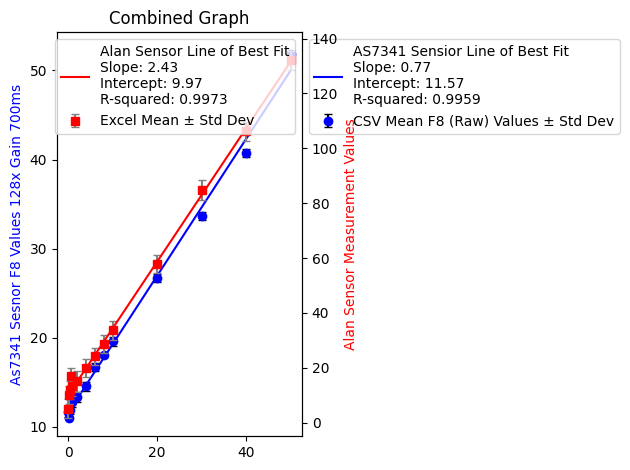

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Read the CSV file without skipping any rows
csv_file_path = "/Users/jessiewynne/chla_fluorometer/AS7341_Dilutions_2_1_ratio_Design/LED with marine epoxy/2_29_24_700ms_128x_alan_optics_1.csv"
df_csv = pd.read_csv(csv_file_path, encoding='utf-8')

# Read the Excel file
excel_file_path = "/Users/jessiewynne/chla_fluorometer/Alan_dilutions/alan dilution 2.15.xlsx"
df_excel = pd.read_excel(excel_file_path)

# Filter out rows where the 'Test' column is 'test'
df_csv = df_csv[df_csv['Test'].str.lower() != 'test']

# Convert 'F8 (Raw)' column to numeric values
df_csv['F8 (Raw)'] = pd.to_numeric(df_csv['F8 (Raw)'], errors='coerce')

# Get unique test categories (dilution values) in the order of appearance
categories = df_csv['Test'].unique()

# Create a dictionary to store the 'F8 (Raw)' values for each category (dilution)
category_f8_raw_dict = {}

# Store unique x-values and their corresponding data points for each dataset
x_values_csv = []
y_values_csv = []
std_devs_csv = []

x_values_excel = []
y_values_excel = []
std_devs_excel = []

for category in categories:
    # Exclude the first data point from each category
    category_df = df_csv[df_csv['Test'] == category][1:]
    category_f8_raw_dict[category] = category_df['F8 (Raw)']

    # Calculate the mean and standard deviation for 'F8 (Raw)' data in each category
    category_f8_raw_mean = category_df['F8 (Raw)'].mean()
    category_f8_raw_std = category_df['F8 (Raw)'].std()

    # Check if the 'Test' value can be converted to a float, otherwise, skip it
    try:
        x_value = float(category)
        x_values_csv.append(x_value)
        y_values_csv.append(category_f8_raw_mean)
        std_devs_csv.append(category_f8_raw_std)
    except ValueError:
        pass

# Read data from Excel file into a pandas DataFrame
df_filtered = df_excel[(df_excel['Measurement Number'] >= 1) & (df_excel['Measurement Number'] <= 250)]
averages_df = df_filtered.groupby('ug/L')['Measurement Value'].agg(['mean', 'std']).reset_index()

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Scatter plot for mean F8 values with error bars and legend for the first dataset
ax1.errorbar(x_values_csv, y_values_csv, yerr=std_devs_csv, fmt='o', capsize=3, ecolor='black', label='CSV Mean F8 (Raw) Values ± Std Dev', color='blue')

# Set the y-axis label
ax1.set_ylabel('As7341 Sesnor F8 Values 128x Gain 700ms', color='blue')

# Create a second y-axis for the Excel data
ax2 = ax1.twinx()

# Scatter plot for mean F8 values with error bars and legend for the second dataset
ax2.errorbar(averages_df['ug/L'], averages_df['mean'], yerr=averages_df['std'], fmt='s', capsize=3, ecolor='gray', label='Excel Mean ± Std Dev', color='red')

# Set the y-axis label for the second y-axis
ax2.set_ylabel('Alan Sensor Measurement Values', color='red')

# Calculate the line of best fit parameters (slope and intercept) for the first dataset
slope_csv, intercept_csv, r_value_csv, _, _ = linregress(x_values_csv, y_values_csv)

# Calculate the line of best fit parameters (slope and intercept) for the second dataset
slope_excel, intercept_excel, r_value_excel, _, _ = linregress(averages_df['ug/L'], averages_df['mean'])

# Plot the line of best fit for the first dataset
ax1.plot(x_values_csv, slope_csv * np.array(x_values_csv) + intercept_csv, label=f'AS7341 Sensior Line of Best Fit\nSlope: {slope_csv:.2f}\nIntercept: {intercept_csv:.2f}\nR-squared: {r_value_csv**2:.4f}', color='blue')

# Plot the line of best fit for the second dataset
ax2.plot(averages_df['ug/L'], slope_excel * np.array(averages_df['ug/L']) + intercept_excel, label=f'Alan Sensor Line of Best Fit\nSlope: {slope_excel:.2f}\nIntercept: {intercept_excel:.2f}\nR-squared: {r_value_excel**2:.4f}', color='red')

# Set x-axis label
plt.xlabel('Concentration (ug/L)')

# Show legend outside of the graph
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Set title
plt.title("Combined Graph")

plt.tight_layout()
plt.show()